# 경사하강법 (Gradient Descent)

기본 개념은 함수의 기울기(경사)를 구하여 기울기가 낮은 쪽으로 계속 이동시켜서 극값에 이를 때까지 반복시키는 것입니다.

**비용 함수 (Cost Function 혹은 Loss Function)를 최소화**하기 위해 반복해서 파라미터를 업데이트 해 나가는 방식입니다.

In [1]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import warnings

# 경고 메시지 출력 표기 생략
warnings.filterwarnings('ignore')

Image(url='https://img.pngio.com/scikit-learn-batch-gradient-descent-versus-stochastic-gradient-descent-png-592_319.png')

## 샘플에 활용할 데이터 셋 만들기

In [2]:
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
    x = np.random.rand(size)
    y = w * x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise
    plt.figure(figsize=(10, 7))
    plt.plot(x, y, color='r', label=f'y = {w}x + {b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=15)
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy

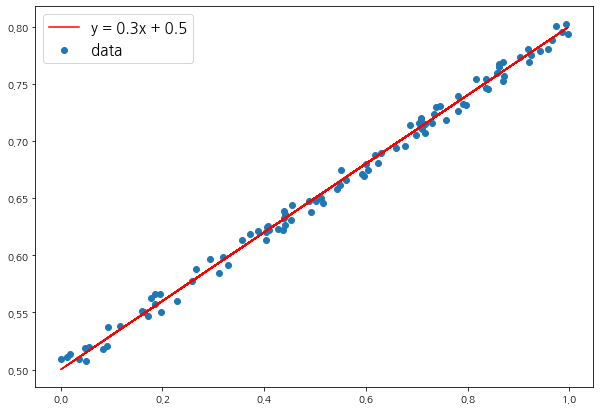

w: 0.3, b: 0.5


In [3]:
x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

## 초기값 (Initializer)과 y_hat (예측, prediction) 함수 정의

w, b 값에 대하여 random한 초기 값을 설정해 줍니다.

In [4]:
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

`y_hat`은 `prediction`은 값 입니다. 즉, 가설함수에서 실제 값 (y)를 뺀 함수를 정의합니다.

In [5]:
# 코드를 입력해 주세요
y_hat = w * x + b

## 오차(Error) 정의

Loss Function 혹은 Cost Function을 정의 합니다.

Loss (Cost) Function은 예측값인 `y_hat`과 `y`의 차이에 **제곱**으로 정의합니다.

제곱은 오차에 대한 음수 값을 허용하지 않으며, 이는 **Mean Squared Error(MSE)**인 평균 제곱 오차 평가 지표와 관련 있습니다.

In [6]:
# 코드를 입력해 주세요
error = ((y_hat - y) ** 2).mean()

## 학습률 (Learning Rate)

In [7]:
Image(url='https://www.deeplearningwizard.com/deep_learning/boosting_models_pytorch/images/lr1.png')

한 번 학습할 때 **얼마만큼 가중치(weight)를 업데이트** 해야 하는지 학습 양을 의미합니다.

너무 큰 학습률 (Learning Rate)은 가중치 갱신이 크게 되어 **자칫 Error가 수렴하지 못하고 발산**할 수 있으며,

너무 작은 학습률은 가중치 갱신이 작게 되어 **가중치 갱신이 충분히 되지 않고, 학습이 끝나** 버릴 수 있습니다. 즉 과소 적합되어 있는 상태로 남아 있을 수 있습니다.



## Gradient Descent 구현 (단항식)

In [8]:
# 최대 반복 횟수
num_epoch = 500

# 학습율 (learning_rate)
learning_rate = 0.5

In [9]:
errors = []
# random 한 값으로 w, b를 초기화 합니다.
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    y_hat = x * w + b

    error = ((y_hat - y)**2).mean()
    if error < 0.0005:
        break

    w = w - learning_rate * ((y_hat - y) * x).mean()
    b = b - learning_rate * (y_hat - y).mean()
    
    errors.append(error)

    if epoch % 5 == 0:
        print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))
    
print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch, w, b, error))

 0 w = 0.72876, b = 0.34391 error = 0.08144
 5 w = 0.63327, b = 0.30860 error = 0.00982
10 w = 0.58471, b = 0.33608 error = 0.00720
15 w = 0.54331, b = 0.35988 error = 0.00529
20 w = 0.50787, b = 0.38025 error = 0.00388
25 w = 0.47754, b = 0.39769 error = 0.00285
30 w = 0.45158, b = 0.41262 error = 0.00210
35 w = 0.42935, b = 0.42539 error = 0.00155
40 w = 0.41033, b = 0.43633 error = 0.00114
45 w = 0.39405, b = 0.44569 error = 0.00085
50 w = 0.38011, b = 0.45370 error = 0.00063
------------------------------------------------------------
54 w = 0.4, b = 0.5 error = 0.00050


**시각화**

학습 진행(epoch)에 따른 오차를 시각화 합니다.

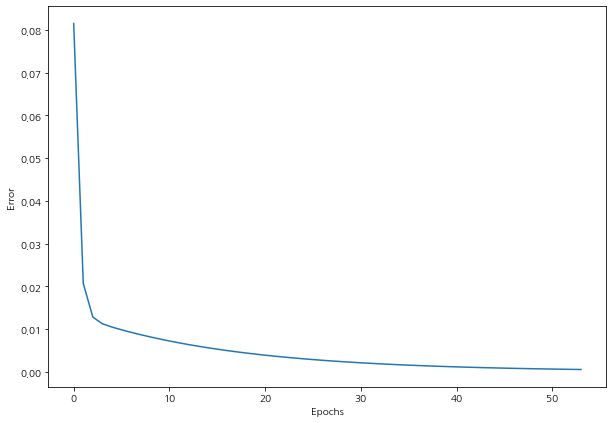

In [10]:
plt.figure(figsize=(10, 7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

## 다항식

**샘플 데이터**를 생성합니다.

이번에는 Feature Data, 즉 X 값이 여러 개인 다항식의 경우에 대해서도 구해보도록 하겠습니다.

다항식에서는 X의 갯수 만큼, W 갯수도 늘어날 것입니다.

다만, bias (b)의 계수는 1개인 점에 유의해 주세요.

In [11]:
x1 = np.random.rand(100)
x2 = np.random.rand(100)
x3 = np.random.rand(100)

**다항식을 정의**합니다.

In [12]:
y = 0.3 * x1 + 0.5 * x2 + 0.7 * x3 + 0.9

## Gradient Descent 구현 (다항식)

In [13]:
errors = []
w1_grad = []
w2_grad = []
w3_grad = []

num_epoch=5000
learning_rate=0.5

w1 = np.random.uniform(low=0.0, high=1.0)
w2 = np.random.uniform(low=0.0, high=1.0)
w3 = np.random.uniform(low=0.0, high=1.0)

b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    # 예측값
    y_hat = w1 * x1 + w2 * x2 + w3 * x3 + b

    error = ((y_hat - y)**2).mean()
    if error < 0.00001:
        break

    # 미분값 적용 (Gradient)
    w1 = w1 - learning_rate * ((y_hat - y) * x1).mean()
    w2 = w2 - learning_rate * ((y_hat - y) * x2).mean()
    w3 = w3 - learning_rate * ((y_hat - y) * x3).mean()

    w1_grad.append(w1)
    w2_grad.append(w2)
    w3_grad.append(w3)

    b = b - learning_rate * (y_hat - y).mean()
    
    errors.append(error)

    if epoch % 5 == 0:
        print("{0:2} w1 = {1:.5f}, w2 = {2:.5f}, w3 = {3:.5f}, b = {4:.5f} error = {5:.5f}".format(epoch, w1, w2, w3, b, error))
    
print("----" * 15)
print("{0:2} w1 = {1:.1f}, w2 = {2:.1f}, w3 = {3:.1f}, b = {4:.1f} error = {5:.5f}".format(epoch, w1, w2, w3, b, error))

 0 w1 = 0.61284, w2 = 0.33497, w3 = 1.03665, b = 0.59917 error = 0.24446
 5 w1 = 0.57785, w2 = 0.40396, w3 = 0.99736, b = 0.65956 error = 0.01635
10 w1 = 0.53454, w2 = 0.44241, w3 = 0.95216, b = 0.68429 error = 0.01120
15 w1 = 0.49899, w2 = 0.47062, w3 = 0.91462, b = 0.70654 error = 0.00782
20 w1 = 0.46965, w2 = 0.49101, w3 = 0.88331, b = 0.72656 error = 0.00555
25 w1 = 0.44531, w2 = 0.50546, w3 = 0.85711, b = 0.74455 error = 0.00401
30 w1 = 0.42501, w2 = 0.51544, w3 = 0.83510, b = 0.76071 error = 0.00295
35 w1 = 0.40799, w2 = 0.52206, w3 = 0.81654, b = 0.77521 error = 0.00220
40 w1 = 0.39364, w2 = 0.52618, w3 = 0.80084, b = 0.78823 error = 0.00166
45 w1 = 0.38148, w2 = 0.52845, w3 = 0.78750, b = 0.79991 error = 0.00127
50 w1 = 0.37113, w2 = 0.52938, w3 = 0.77613, b = 0.81038 error = 0.00098
55 w1 = 0.36227, w2 = 0.52936, w3 = 0.76640, b = 0.81976 error = 0.00076
60 w1 = 0.35466, w2 = 0.52866, w3 = 0.75805, b = 0.82817 error = 0.00059
65 w1 = 0.34809, w2 = 0.52752, w3 = 0.75086, b = 0.

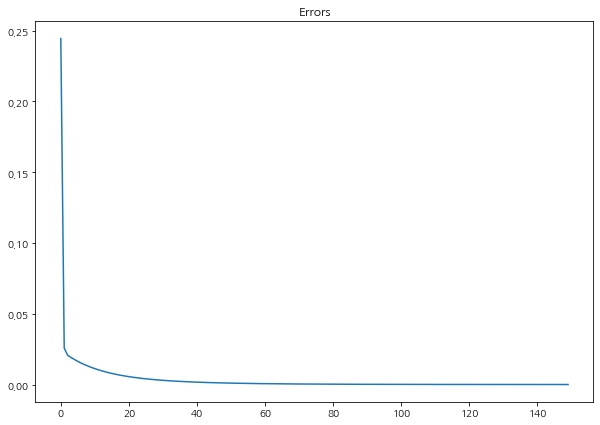

In [14]:
plt.figure(figsize=(10, 7))
plt.plot(errors)
plt.title('Errors')
plt.show()

## 가중치 (W1, W2, W3) 값들의 변화량 시각화

`Epoch`가 지남에 따라 어떻게 가중치들이 업데이트 되는지 시각화 해 봅니다.

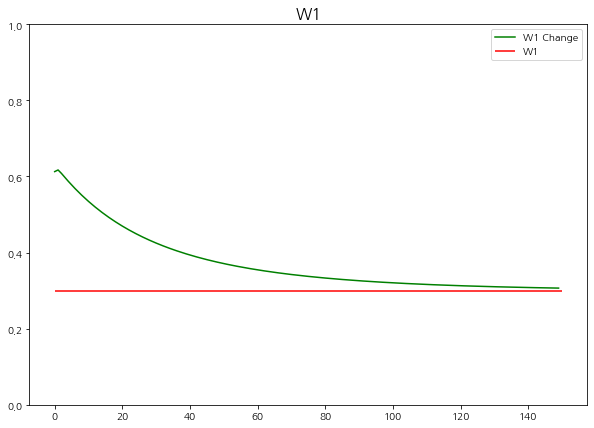

In [15]:
plt.figure(figsize=(10, 7))

plt.hlines(y=0.3, xmin=0, xmax=len(w1_grad), color='r')
plt.plot(w1_grad, color='g')
plt.ylim(0, 1)
plt.title('W1', fontsize=16)
plt.legend(['W1 Change', 'W1'])
plt.show()

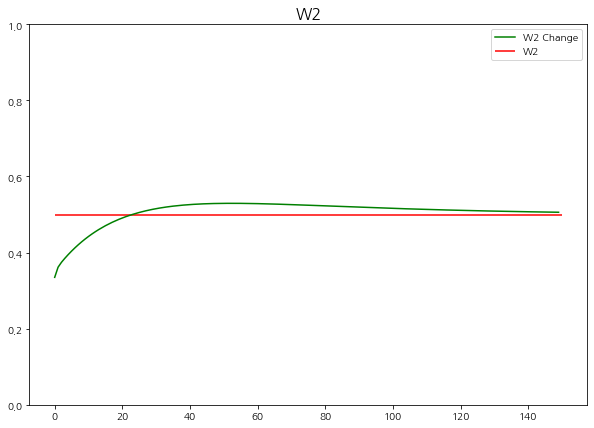

In [16]:
plt.figure(figsize=(10, 7))

plt.hlines(y=0.5, xmin=0, xmax=len(w2_grad), color='r')
plt.plot(w2_grad, color='g')
plt.ylim(0, 1)
plt.title('W2', fontsize=16)
plt.legend(['W2 Change', 'W2'])
plt.show()

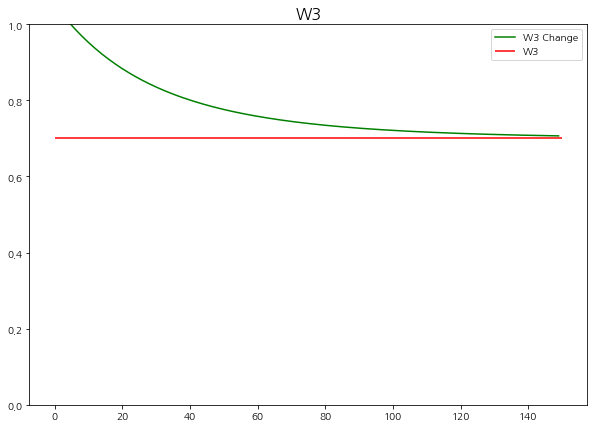

In [17]:
plt.figure(figsize=(10, 7))

plt.hlines(y=0.7, xmin=0, xmax=len(w3_grad), color='r')
plt.plot(w3_grad, color='g')
plt.ylim(0, 1)
plt.title('W3', fontsize=16)
plt.legend(['W3 Change', 'W3'])
plt.show()